<h1>Grupo 3 - Patch Generator</h1>
<p>Érick Teixeira Rodrigues (176880/2022)</p>
<p>Lenon Silva de Oliveira (333016/2022)</p>
<p>Ricardo Villar (Aluno Especial)</p>
<p>Vinícius D'Lucas Bezerra e Queiroz (361406/2022)</p>

### Descrição do Projeto

##### Título proposto - projeto 8: Criação de patches de imagens para treinamento de classificadores

<p> A criação de patches de imagens é um procedimento de subdivisão de uma
imagem ou stack de imagens em recortes menores, que possibilitam a otimização
de diversos processos, como por exemplo: o de treinamento de classificadores
supervisionados, substituição de partes de imagens com ruídos ou problemas.
Devido ao menor espaço ocupado na memória do computador, essas
pequenas partes podem ter um desempenho computacional e de tempo superior à
classificação da imagem como um todo.</p>


##### Proposta Inicial


*   <p><s>Ler bandas/imagens e fazer um empilhamento ou Acessar as imagens do BDC (Desafio);</s></p>
*   O usuário já oferece a imagem de entrada;

*   <p>Seleção do Método de Patching a partir da criação de um módulo com funções diferenças para cada necessidade;</p>

*   Retorna ao usuário vários arquivos de patches da imagem de entrada.



##### Proposta Final

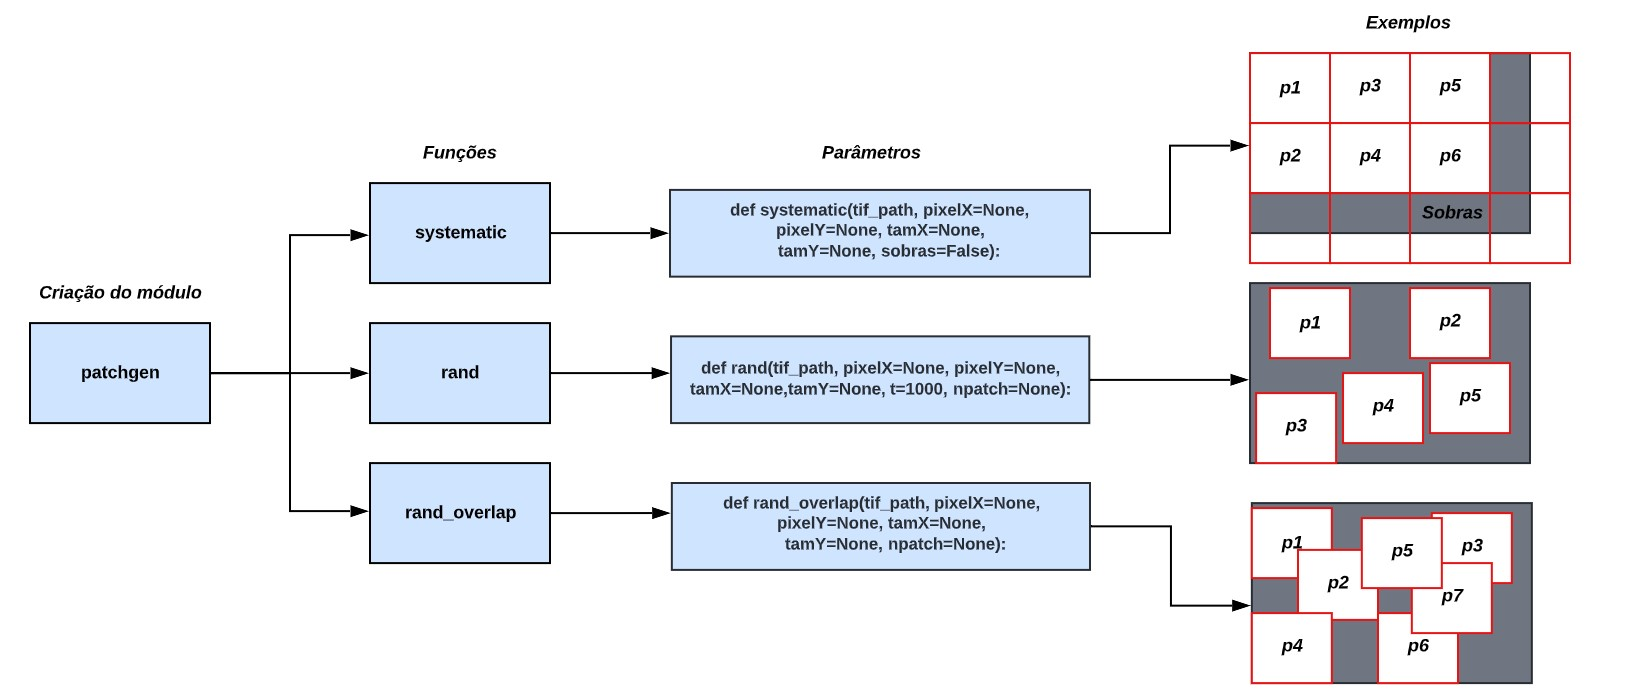

#### *Considerações Iniciais de Uso*

1. Imagens Georreferenciadas; 
2. Sistema de Projeção Cartográfica UTM;
3. NoData faz parte da imagem;
4. É de responsabilidade do usuário a inserção correta do dado;
5. Os patches são retangulares;


## Módulo patchgen

### 1.Patch Sistemático

###### Esquema:

<div>
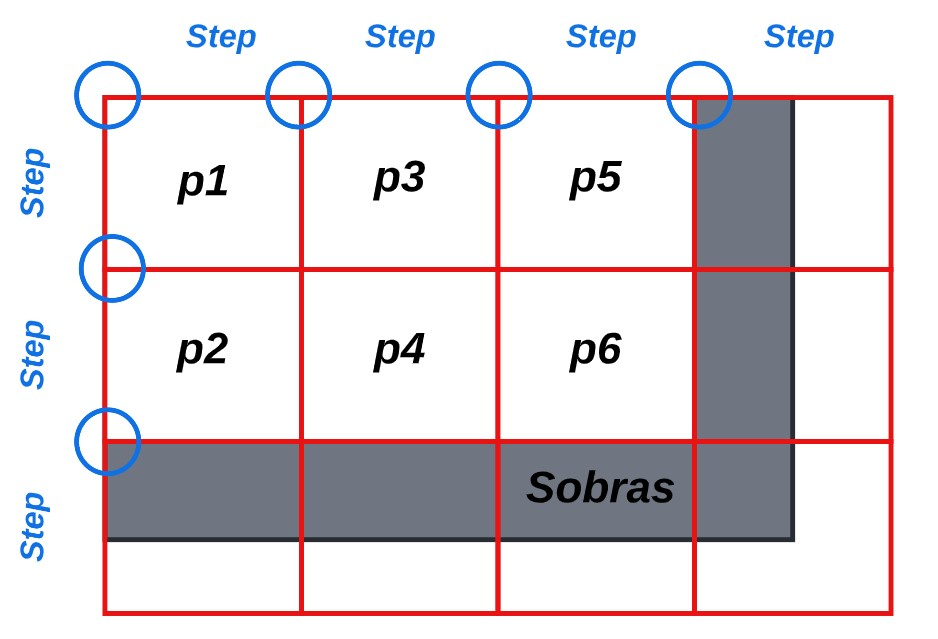
</div>


In [2]:
"""
Biblioteca com funções para geração de Patchs
"""

from osgeo import gdal
import random

In [3]:
def systematic(tif_path, pixelX=None, pixelY=None, tamX=None,
                    tamY=None, sobras=False):
    """
    Função para criação de patchs conforme parâmetros escolhidos pelo usuário.

    patch_generator(tif_path, pixelX=None, pixelY=None, tamX=None,
                    tamY=None, sobras = False)


    tif_path: Deve ser inserida uma string com o
    diretório onde a imagem raster está inserida.
    ex: '/content/crop_rapideye.tif'


    pixelX: Deve ser inserido um valor inteiro com
    a dimensão desejada para o eixo X do patch.
    (Dimensão X do Patch em pixels)
    ex: 300

    pixelY: Deve ser inserido um valor inteiro com
    a dimensão desejada para o eixo Y do patch.
    (Dimensão Y do Patch em pixels)
    ex: 300

    tamX: Deve ser inserido um valor inteiro, em metros, da
    dimensão desejada para o eixo X do patch.
    (Dimensão X do Patch em metros)
    ex: 1500

    tamY: Deve ser inserido um valor inteiro, em metros, da
    dimensão desejada para o eixo Y do patch
    (Dimensão Y do Patch em metros)
    ex: 1500

    sobras: Quando True irá gerar recortes das bordas, caso estas
    apresentem dimensões inferiores às inseridas pelo usuário


    Exemplo de aplicação:
    Por exemplo, inserindo os seguintes parâmetros...

    patch_generator('/content/crop_rapideye.tif', pixelX=300, pixelY=300)

    Serão criados patches de 300x300 pixels do raster
    crop_rapideye.tif
    """

    raster = gdal.Open(tif_path)

    # Coletando os dados do raster
    gt = raster.GetGeoTransform()
    name = raster.GetDescription()
    name = name.split('.')[-2]

    # Separando os valores da lista gt
    # Coleta da coordenada x do canto superior esquerdo
    img_xmin = gt[0] 
    # Coleta da coordenada y do canto superior esquerdo
    img_ymax = gt[3]
    # Coleta da resolução da imagem
    res = gt[1]

    # Verificandoo tamanho da imagem nos eixos x e y.
    # n_pixelsx é o numero de pixels na dimensão x
    # n_pixelsy é o numero de pixels na dimensão y
    n_pixelsx = raster.RasterXSize
    n_pixelsy = raster.RasterYSize

    # img_xlen é tamanho da imagem em metros na dimensão x 
    # img_ylen é tamanho da imagem em metros na dimensão y 
    img_xlen = res * n_pixelsx
    img_ylen = res * n_pixelsy


    # Delimitando o tamanho do patch
    
    # Caso o usuário insera o valor das dimensões do patch em pixels
    if pixelX != None and pixelY != None:
        # tamanho do patch em metros
        patch_xlen = pixelX * res 
        patch_ylen = pixelY * res
        print(f'Tamanho do patch: {patch_xlen}m x {patch_ylen}m')

    # Caso o usuário insira o valor das dimensões do patch em metros
    elif  tamX != None and tamY != None:
        patch_xlen = tamX
        patch_ylen = tamY

    # Verificação do número de patches por eixo (dimensão total da imagem no eixo x // dimensão do patch em metros no eixo x)
    xdiv = img_xlen//patch_xlen
    # Verificação do número de patches por eixo (dimensão total da imagem no eixo y // dimensão do patch em metros no eixo y)
    ydiv = img_ylen//patch_ylen

    # Verificação do número total de patches
    total_patches= xdiv*ydiv
    print(f'Número total de patches ({pixelX}m x{pixelY}m) criados: {total_patches}')

    # Testando se o tamanho da imagem é proporcional ao tamanho do patch nas duas dimensões
    # Verificando se o tamanho do patch inserido pelo usuário é múltiplo da dimensão da imagem tif

    if img_xlen % patch_xlen != 0 or img_ylen % patch_ylen !=0:
        print(f'O tamanho da imagem não é múltiplo do tamanho do patch.\n')
       
       # Se o valor na dimensão x ou y não for divisível pela dimensão total da imagem, será aumentado
       # um valor no número de sobras
        if sobras:
            if img_xlen % patch_xlen != 0:
                xdiv += 1
            elif img_ylen % patch_ylen !=0:
                ydiv += 1
                t_patches= xdiv*ydiv
            print(f'Número total de patches a serem criados (+ sobras): {total_patches} patches + {t_patches - total_patches} sobras')

    # img_xmin = coord_x canto superior esquerdo; img_ymax = coord_y canto superior esquerdo;

    # Criação de uma lista com as coordenadas em x, através de uma list comprehension 
    # com step de 0 até o número total de patches no eixo x(xdiv)
    xsteps = [img_xmin + patch_xlen*i for i in range(int(xdiv)+1)]

    # Criação de uma lista com as coordenadas em y, através de uma list comprehension 
    # com step de 0 até o número total de patches no eixo y(xdiv)
    ysteps = [img_ymax - patch_ylen*i for i in range(int(ydiv)+1)]

    # Pergunta para o usuário, verificando se ele realmente quer fazer o número de patches
    # Esse passo é para evitar a criação de números demasiados de patches devido erro de digitação
    resp = input(f'Você gostaria de criar {total_patches} patches? (S/N)')

    # Se a respota for Sim (S), os patches serão criados
    if resp.upper() == 'S':
        # id = número inicial do nome atribuído a cada um dos patches, começando pelo 1
        id = 1
        # Criação de dois for aninhado para a definição das coordenadas de recorte
        for i in range(int(xdiv)):
            for j in range(int(ydiv)):
                # Coordenadas x (max/min) para o recorte, extraídas da lista de coordenadas criadas anteriormente (xsteps)
                xmin = xsteps[i]
                xmax = xsteps[i+1]
                # Coordenadas y (max/min) para o recorte, extraídas da lista de coordenadas criadas anteriormente (ysteps)
                ymax = ysteps[j]
                ymin = ysteps[j+1]

                gdal.Warp(name + '_' + 'p' + str(id) +'.tif', raster, outputBounds = (xmin, ymin, xmax, ymax), dstNodata = -9999)
                id += 1
        print(f'>> {total_patches} patches criados!')
    # Caso a resposta seja não (n), o programa não irá criar os patches
    elif resp.upper() == 'N':
        print('Programa finalizado, você optou por não criar nenhum patch.')
        print('-' * 100)

###### 1.2 Teste

In [15]:
systematic('CBERS_4A_WPM_20210408_RGB.tif', pixelX=500, pixelY=500, sobras=False)

Tamanho do patch: 4000.0m x 4000.0m
Número total de patches (500m x500m) criados: 24.0
O tamanho da imagem não é múltiplo do tamanho do patch.

Você gostaria de criar 24.0 patches? (S/N)S
>> 24.0 patches criados!


### 2.Patch Aleatório com Sobreposição

###### Esquema:

<div>
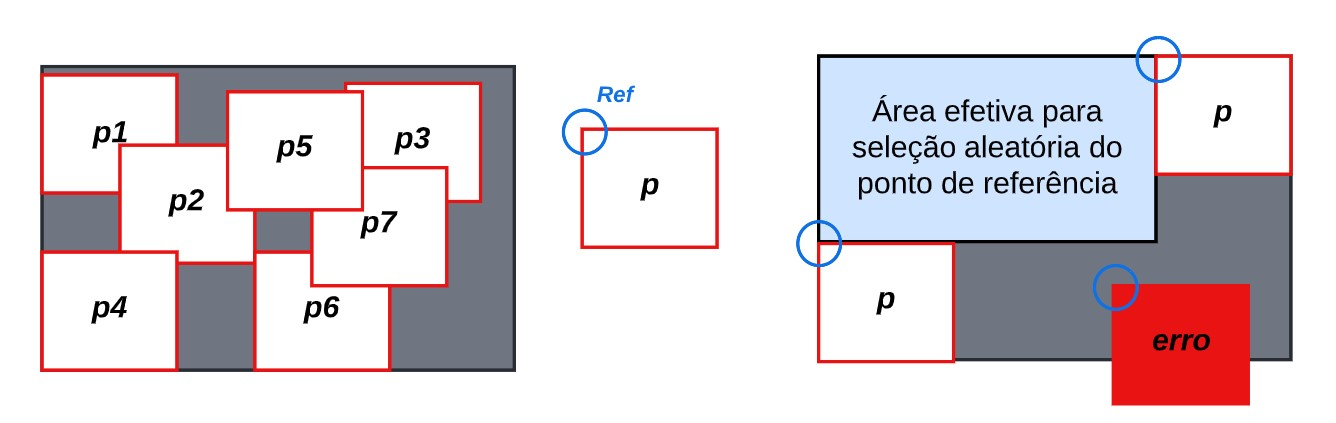
</div>


In [7]:
def rand_overlap(tif_path, pixelX=None, pixelY=None, tamX=None,
                    tamY=None, npatch=None):
    """
    Função para criação de patches em posições aleatórias da imagem
    com a possibilidade de sobreposição.

    patchgen.rand_overlap (tif_path, pixelX=None, pixelY=None, tamX=None,
                    tamY=None, npatch=None)


    tif_path: Deve ser inserida uma string com o
    diretório onde a imagem raster está inserida.
    ex: '/content/crop_rapideye.tif'


    pixelX: Deve ser inserido um valor inteiro com
    a dimensão desejada para o eixo X do patch.
    (Dimensão X do Patch em pixels)
    ex: 300

    pixelY: Deve ser inserido um valor inteiro com
    a dimensão desejada para o eixo Y do patch.
    (Dimensão Y do Patch em pixels)
    ex: 300

    tamX: Deve ser inserido um valor inteiro, em metros, da
    dimensão desejada para o eixo X do patch.
    (Dimensão X do Patch em metros)
    ex: 1500

    tamY: Deve ser inserido um valor inteiro, em metros, da
    dimensão desejada para o eixo Y do patch
    (Dimensão Y do Patch em metros)
    ex: 1500

    npatch: Quantidade de patches a serem criados.

    Exemplo de aplicação:
    Por exemplo, inserindo os seguintes parâmetros...

    patch.rand_overlap('/content/crop_rapideye.tif', pixelX=300, pixelY=300, npatch=50)

    Serão criados 50 patches do raster crop_rapideye.tif de interesse, 
    com 300x300 pixels, de forma aleatória e com possibilidade de 
    sobreposição entre os patches.
    """
    raster = gdal.Open(tif_path)
    # Coletando os dados do raster
    gt = raster.GetGeoTransform()
    
    # Coletando o nome do arquivo
    name = raster.GetDescription()
    name = name.split('.')[-2]
    
    # Separando os valores da lista gt
    img_xmin = gt[0] #Coordenada x do pixel do canto superior esquerdo
    img_ymax = gt[3] #Coordenada y do pixel do canto superior esquerdo
    res = gt[1] #Resolução do pixel ao longo do eixo x

    if tamX != None and tamY != None:
        pixelX = tamX // res
        pixelY = tamY // res
    
    # Cálculo do número de pixels na imagem
    n_pixelsx = raster.RasterXSize
    n_pixelsy = raster.RasterYSize
    
    # Cálculo do tamanho da imagem em metros
    img_xlen = res * n_pixelsx
    img_ylen = res * n_pixelsy

    # Limites efetivo da geração aleatória de pontos (Número de pixels da imagem - tamanho do patch)
    img_limx = n_pixelsx - pixelX
    img_limy = n_pixelsy - pixelY

    # Parâmetros iniciais para cálculo das posições aleatórias
    i = 0 
    
    # Criando coordenadas limites dos patches
    for i in range(0, npatch):
        
        x = random.randrange(0,img_limx)
        y = random.randrange(0,img_limy)
        
    # Calculando xmax,xmin, ymax,ymin dos patches em coordenadas UTM.
        xmin = img_xmin + (x * res)
        xmax = xmin + pixelX*res
        ymax = img_ymax - (y * res)
        ymin = img_ymax - (y + pixelY)*res
              
        i +=1
        
    # Passando as dimensões do patch para realização do subset da imagem de entrada.
        gdal.Warp(name + '_' + 'rp' + str(i) +'.tif', raster, outputBounds = (xmin, ymin, xmax, ymax), dstNodata = -9999)
        
      
    print(f'>> {i} patches criados!')

###### 2.1 Teste

In [16]:
rand_overlap('CBERS_4A_WPM_20210408_RGB.tif', pixelX=500, pixelY=500, npatch=5)

>> 5 patches criados!


### 3.Patch Aleatório sem Sobreposição

###### Esquema:

<div>
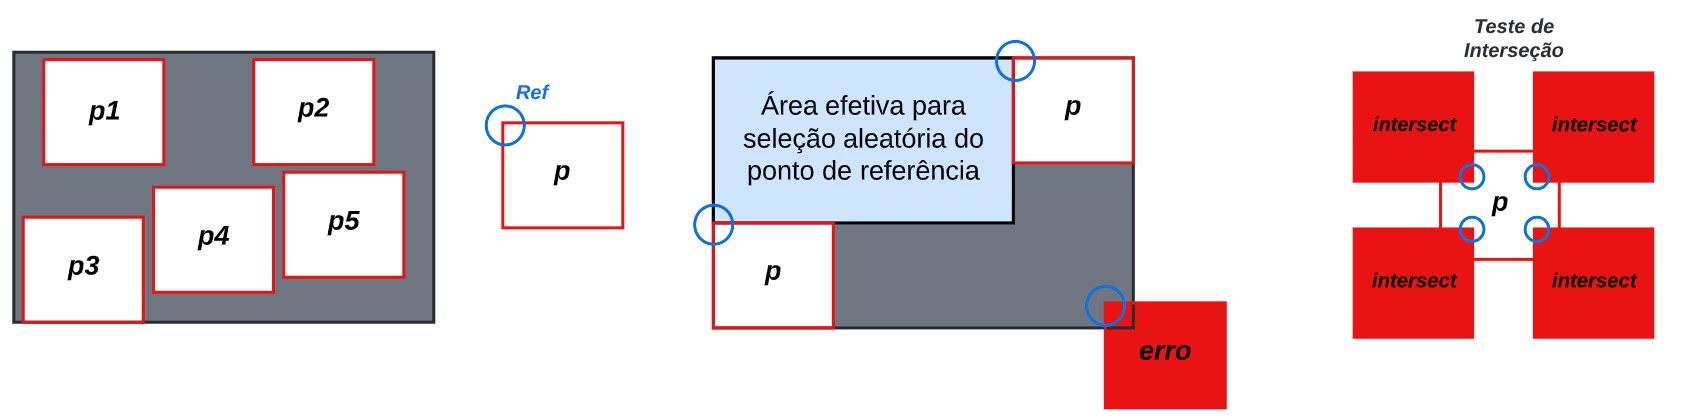
</div>


In [11]:
def point_intersection(x1,y1,x2,y2,pixelX,pixelY):
    """
    Função criada para identificar a interseção de um ponto do patch
    e os limites de um patch anterior. 
    
    x1,y1 - Coordenadas do pixel de um ponto extremo do novo patch.
    x2,y2 - Coordenadas do pixel do ponto superior esquerdo do patch anterior.
    
    pixelX,pixelY - Tamanho do patch em pixels.
    """
    return x2 <= x1 <= x2 + pixelX and y2 <= y1 <= y2 + pixelY
    

def patch_intersection(x1,y1,x2,y2,pixelX,pixelY):
    """
    Função criada para identificar a interseção de um ponto do patch
    e os limites de um patch anterior. 
    
    x1,y1 - Coordenadas do pixel de um ponto extremo do novo patch.
    x2,y2 - Coordenadas do pixel do ponto superior esquerdo do patch anterior.
    
    pixelX,pixelY - Tamanho do patch em pixels.
    """
    return (point_intersection(x1,y1,x2,y2,pixelX,pixelY) or 
        point_intersection(x1 + pixelX ,y1,x2,y2,pixelX,pixelY) or
        point_intersection(x1,y1 + pixelY,x2,y2,pixelX,pixelY) or
        point_intersection(x1 + pixelX,y1 + pixelY,x2,y2,pixelX,pixelY))


def rand(tif_path, pixelX=None, pixelY=None, tamX=None,
                    tamY=None, t=1000, npatch_max=None):
    """
    Função para criação de patches em posições aleatórias da imagem
    sem possibilidade de sobreposição.

    patchgen.rand (tif_path, pixelX=None, pixelY=None, tamX=None,
                    tamY=None, t=1000, npatch=None)


    tif_path: Deve ser inserida uma string com o
    diretório onde a imagem raster está inserida.
    ex: '/content/crop_rapideye.tif'

    pixelX: Deve ser inserido um valor inteiro com
    a dimensão desejada para o eixo X do patch.
    (Dimensão X do Patch em pixels)
    ex: 300

    pixelY: Deve ser inserido um valor inteiro com
    a dimensão desejada para o eixo Y do patch.
    (Dimensão Y do Patch em pixels)
    ex: 300

    tamX: Deve ser inserido um valor inteiro, em metros, da
    dimensão desejada para o eixo X do patch.
    (Dimensão X do Patch em metros)
    ex: 1500

    tamY: Deve ser inserido um valor inteiro, em metros, da
    dimensão desejada para o eixo Y do patch
    (Dimensão Y do Patch em metros)
    ex: 1500

    t: Número máximo de tentativas consecutivas  para geração de cada patch de
    forma aleatória sem sobreposição.

    npatch: Quantidade de patches a serem criados.

    Exemplo de aplicação:
    Por exemplo, inserindo os seguintes parâmetros...

    patch_generator('/content/crop_rapideye.tif', pixelX=300, pixelY=300, t=1000)

    Serão executadas 1000 tentativas para a criação de cada patch de 300x300 pixels do raster
    crop_rapideye.tif em posições aleatórias.
    """
    
    raster = gdal.Open(tif_path)
    
    #Coletando os dados do raster
    gt = raster.GetGeoTransform()
    
    name = raster.GetDescription()
    name = name.split('.')[-2]
    # Separando os valores da lista gt
    img_xmin = gt[0]
    img_ymax = gt[3]
    res = gt[1]

    if tamX != None and tamY != None:
        pixelX = tamX // res
        pixelY = tamY // res

    n_pixelsx = raster.RasterXSize
    n_pixelsy = raster.RasterYSize

    img_xlen = res * n_pixelsx
    img_ylen = res * n_pixelsy

    # limites da geração aleatória de pontos
    img_limx = n_pixelsx - pixelX
    img_limy = n_pixelsy  - pixelY

    # Parâmetros iniciais para cálculo das posições aleatórias
    iteracoes=0
    indice = 0
    tentativas = 0
    vetor = []  

    while True:
        # Inicialização dos parâmetros
        any_intersection = False 
        iteracoes +=1
        
        # Seleção aleatória de pixels
        x = random.randrange(0,img_limx)
        y = random.randrange(0,img_limy)
        
        # Calculando xmax,xmin, ymax,ymin dos patches em coordenadas UTM.        
        
        for old_x,old_y in vetor:
            if patch_intersection(old_x,old_y,x,y, pixelX, pixelY):
                any_intersection = True
                
        # Se não houver interseção com os patches anteriores, realiza o cálculo.
        if not any_intersection:
            
            xmin = img_xmin + (x * res)
            xmax = xmin + pixelX*res
            ymax = img_ymax - (y * res)
            ymin = img_ymax - (y + pixelY)*res
            
            indice +=1
            gdal.Warp(name + '_' + 'rps' + str(indice) +'.tif', raster, outputBounds = (xmin, ymin, xmax, ymax), dstNodata = -9999) 
            vetor.append((x,y))
            tentativas = 0
        
        # Se houver, incrementa o número de tentativas
        else:
            tentativas +=1
        
        # Critério de parada
        if tentativas >= t or indice == npatch_max:
            print(f'Número de tentativas sem resolução atingido!')
            print(f'Número de patches criados: {indice}')
            print(f'Iterações = {iteracoes}')
            print('-' * 100)
            break
        

###### 3.1 Teste

In [17]:
rand('CBERS_4A_WPM_20210408_RGB.tif', pixelX=500, pixelY=500, t=1000)

Número de tentativas sem resolução atingido!
Número de patches criados: 14
Iterações = 1343
----------------------------------------------------------------------------------------------------
